## Natural Language Processing Word2Vec-Visualization

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.manifold import TSNE
from PIL import Image


### Model dependencies
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
### Data collection dependencies
import bs4 as bs
import urllib
import re

# Look at continuous bag of words and GloVe medthod.
- Both word2vec and glove enable us to represent a word in the form of a vector (often called embedding). They are the two most popular algorithms for word embeddings that bring out the semantic similarity of words that captures different facets of the meaning of a word.
- Word2Vec is a feed forward neural network based model to find word embeddings. There are two models that are commonly used to train these embeddings: The skip-gram and the CBOW model. 

## Continuous Bag of Words Method

> **Continuous bag of words method** is a Natural Language Processing algorithm that tries to predict the current target word (the center word) based on the source context words (surrounding words). The way CBOW work is that it tends to predict the probability of a word given a context. A context may be a single word or a group of words. Considering a simple sentence, `the quick brown fox jumps over the lazy dog`, this can be pairs of `(context_window, target_word)` where if we consider a context window of size 2, we have examples like `([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy)` and so on. Thus the model tries to predict the target_word based on the context_window words.

In [ ]:
!wget https://cdn-images-1.medium.com/max/800/1*UVe8b6CWYykcxbBOR6uCfg.png
from IPython.display import clear_output
clear_output()

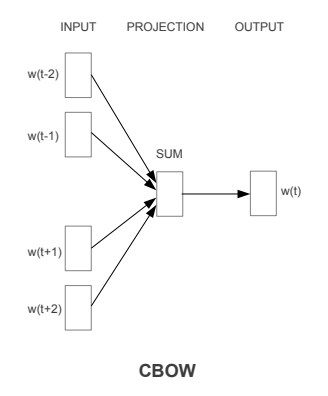

In [ ]:
Image.open("/content/1*UVe8b6CWYykcxbBOR6uCfg.png")

## GloVe Method

**GloVe Method**:  GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

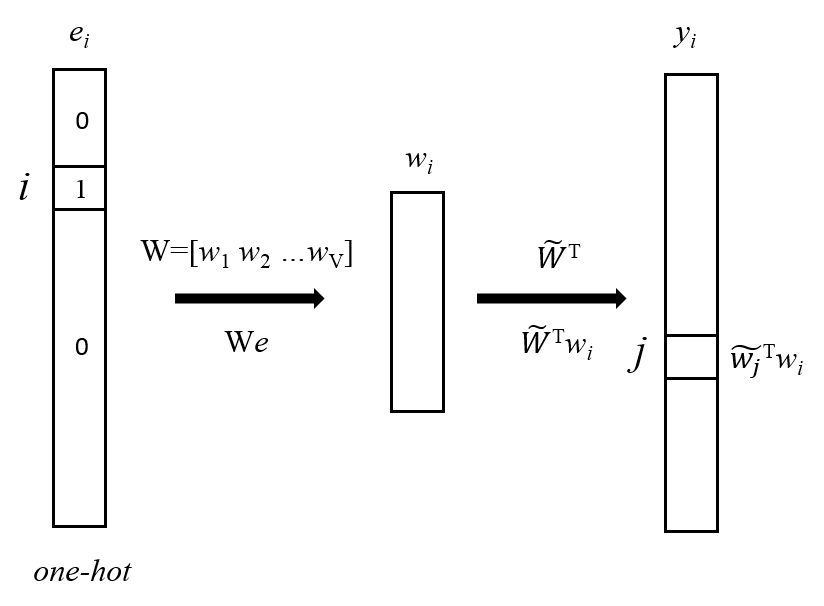

In [ ]:
!wget https://www.researchgate.net/publication/337461648/figure/fig1/AS:828225202700298@1574475684918/The-model-architecture-of-GloVe-The-input-is-a-one-hot-representation-of-a-word-The.ppm
from IPython.display import clear_output
clear_output()

## Picture 
Image.open("The-model-architecture-of-GloVe-The-input-is-a-one-hot-representation-of-a-word-The.ppm")

- The model architecture of GloVe. The input is a one-hot representation of a word. The word embedding matrices serve as weight matrices in the model and thus the output of the model is a vector of inner products of word vectors.

# Compare and contrast between GloVe versus Skip-gram method.


## Properties of Skip-gram and GloVe
1. The relationship between words is derived by cosine distance between words. Such word vectors are good at answering analogy questions. For instance, in the picture below, we see that the distance between king and queen is about the same as that between man and woman.

 
. 

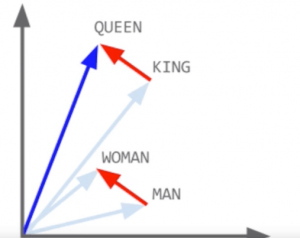

In [ ]:
!wget https://machinelearninginterview.com/wp-content/uploads/2019/02/w2vec-300x238.png
from IPython.display import clear_output
clear_output()

## Picture 
Image.open("/content/w2vec-300x238.png")

2. Semantically similar words are close together. Consider two words such as learn and study. These words are closer to each other in cosine distance compared to ‘learn‘ and ‘eat‘.

3. We can also use arithmetic on these embeddings to derive meaning. For instance in the example below, we see that “Berlin-Germany+France=Paris”.

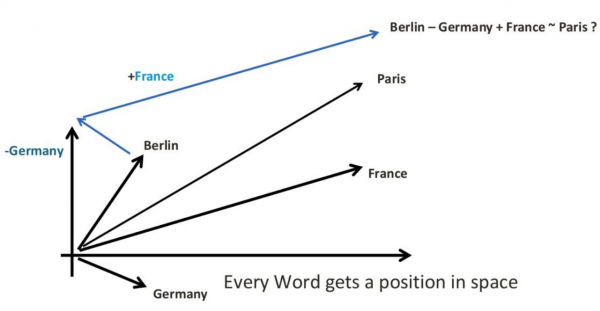

In [ ]:
!wget https://machinelearninginterview.com/wp-content/uploads/2019/02/w2vec2-600x311.png
from IPython.display import clear_output!wget https://machinelearninginterview.com/wp-content/uploads/2019/02/w2vec-300x238.png
from IPython.d
clear_output()

## Picture 
Image.open("/content/w2vec2-600x311.png")

4. We can obtain phrasal Embeddings by adding up word embeddings: Since we can perform arithmetic operations on these vectors in a way that can preserve their semantics, one can find an embedding for a phrase by adding up embedding for individual words.

### Advantages of Skip-gram over GloVe
1.   The Skip-gram model can capture two semantics for a single word, i.e it will have two vector represention of Apple. One for company and one for the fruit
2.   The Skip-gram with negative subsampling generally outperforms all other methods. 


In [ ]:
!wget https://cdn-images-1.medium.com/max/800/1*SR6l59udY05_bUICAjb6-w.png
from IPython.display import clear_output
clear_output()

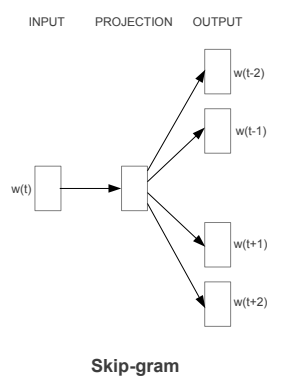

In [ ]:
Image.open("/content/1*SR6l59udY05_bUICAjb6-w.png")

### Differences in the properties of Skip-gram and glove:

- The two models differ in the way they are trained, and hence lead to word vectors with subtly different properties. `Glove` model is based on leveraging global word to word co-occurance counts leveraging the entire corpus. `Skip-gram` on the other hand leverages co-occurance within local context (neighbouring words).
- Skip-gram focuses on context of a given corpus whereas GloVe focuses on words co-occurrences over the whole corpus. Its embeddings relate to the probabilities that two words appear together. GloVe avoids a large computional cost by avoiding building full co-occurence matrix, but instead training will be done directly on the non-zero elements.

### Extension of wikipedia Exercise

In [ ]:
# link to the wikipedia of the president Senegal
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text


# save text data in a new variable
Raw_text = article_text

In [ ]:
### Removing unwated characters
def txt_preprocessor(text):
    text = re.sub('\[[0-9]*\]','', text)
    text = re.sub('\[[A-Za-z]*\]', ' ', text)

    text = re.sub('[()]', '', text)
    text = re.sub('[\n]', ' ', text)
    text = re.sub('\["23]', ' ', text)
    text = re.sub('[$]', ' ', text)
    text = re.sub('["]', ' ', text)
    text = re.sub('[%]', ' ', text)
    text = re.sub('[\ufeff]', ' ', text)
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    text = text.lower()
    
    return text
text = txt_preprocessor(Raw_text)

## Using Vectorizer for Word presentation Matrix on the Wikipedia

In [ ]:
## using a simple rule-based segmenter with native python code
def sentence_segmenter(text):
    current_position = 0
    cursor = 0
    sentences = []
    for c in text:
        if c == "." or c == "!" or c == "?":
            sentences.append(text[current_position:cursor+1])
            current_position = cursor + 2
        cursor+=1
        
    return sentences

sentences = sentence_segmenter(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

In [ ]:
### Converting the sparse matrix into an array 
X_array = X.toarray()
X_array.shape

(95, 778)

### Performing SVD on the vectorized matrix for two dimensional visuals

In [ ]:
la = np.linalg
U, s, Vh = la.svd(X_array, full_matrices = False)

## For visualization we shall pick the first two columns of the singular values 
svd_twodim = U[:, :2]

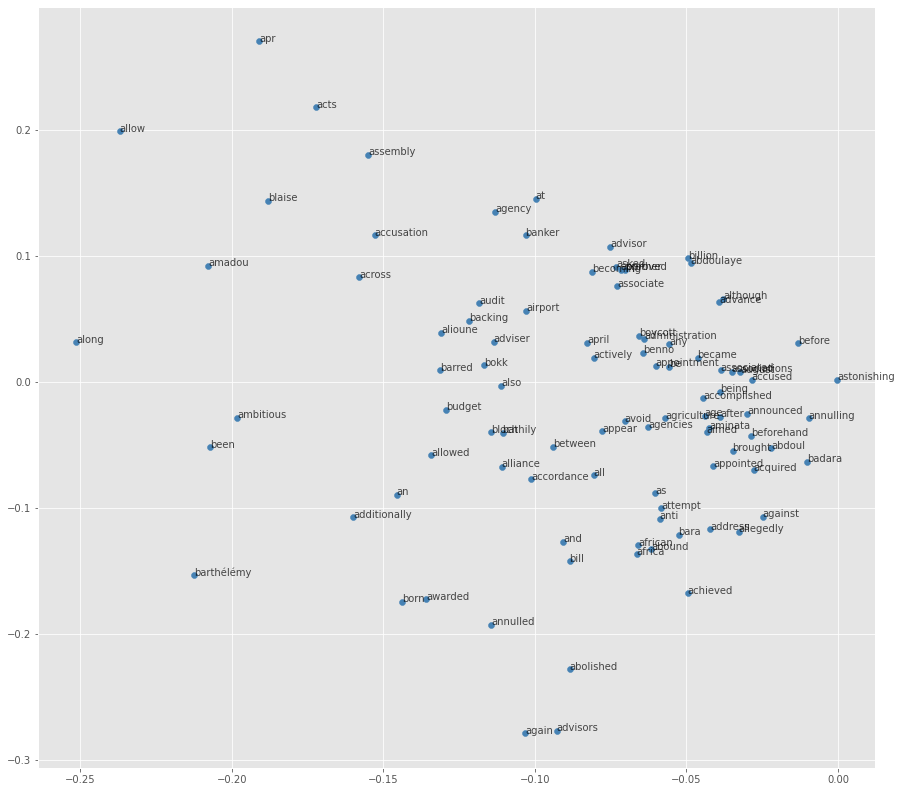

In [ ]:
fig, ax = plt.subplots(figsize=(15, 14))
for idx in range(svd_twodim.shape[0]):
    plt.scatter(*svd_twodim[idx, :], color='steelblue')
    plt.annotate(vectorizer.get_feature_names()[idx], (svd_twodim[idx, 0], svd_twodim[idx, 1]), alpha=0.7)

## Using TSNE for visualization in comparision with the SVD

In [ ]:
from sklearn.manifold import TSNE

viz_words = 95
tsne = TSNE()
embed_tsne = tsne.fit_transform(X_array)

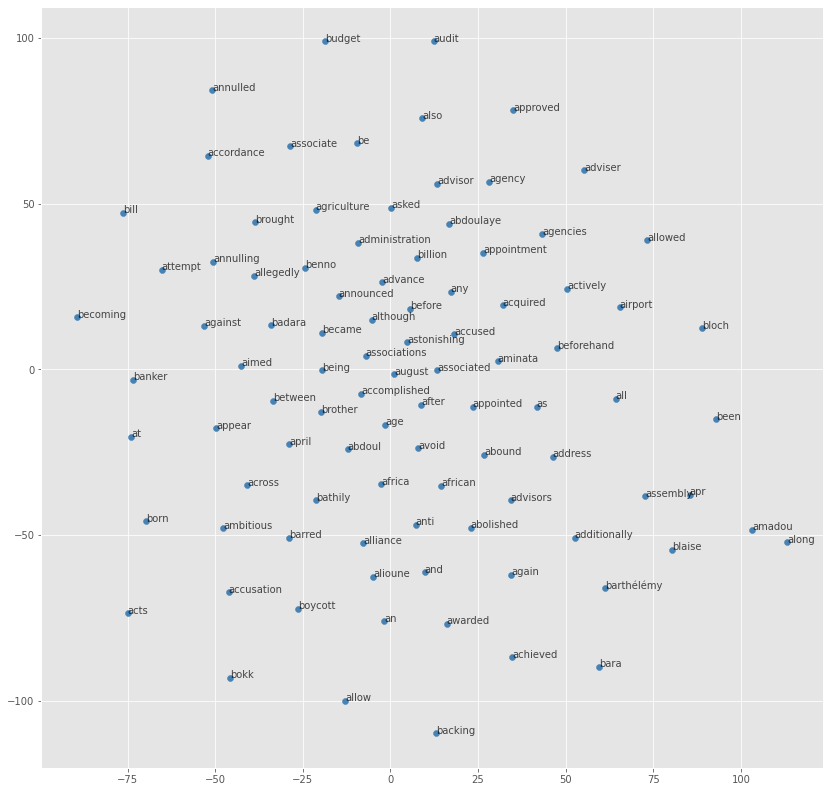

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(vectorizer.get_feature_names()[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

### Using Gensim to visualize some words from the wikipedia text.

In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'

In [ ]:
import zipfile
## Unzip the downloaded file

zip_ref = zipfile.ZipFile("glove.6B.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Using thr 100 dimension glove file.
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
## Analogy function to perform simple addition and subtravtion operations.
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

### Creating Vocabulary and selecting some words: We have here vocabulary size of `862`. 

In [ ]:
## Creating a vocab for this text
splitted_text = text.split()
print("The number of words after splitting is:", len(splitted_text))

## Get the unique characters in sorted manner.
vocab = sorted(set(splitted_text))
print("The number of words in vocabulary is:", len(vocab))

The number of words after splitting is: 2322
The number of words in vocabulary is: 862


### Selecting `some` words from the vocabulary and getting the embeddings using the GloVe `100d`
> 

In [ ]:
Selected_words = vocab[:95] ## Get 95 words from the dictionary
embeddings = [model[word] for word in Selected_words if word in model.vocab] # Get embeddings for each word and in a list
embeddings = np.array(embeddings) ## Convert the embeddings into numpy array 

embed_words = [word for word in Selected_words if word in model.vocab] ## Since some words in our vocab may not exist in the model.vocab, we use if condition to get embeddings for available words

### Visualizing the embeddings using TSNE in two dimensional view

In [ ]:
viz_words = len(embed_words) ## Thus 80 words from our vocabulary
tsne = TSNE()
gensim_embed_tsne = tsne.fit_transform(embeddings)

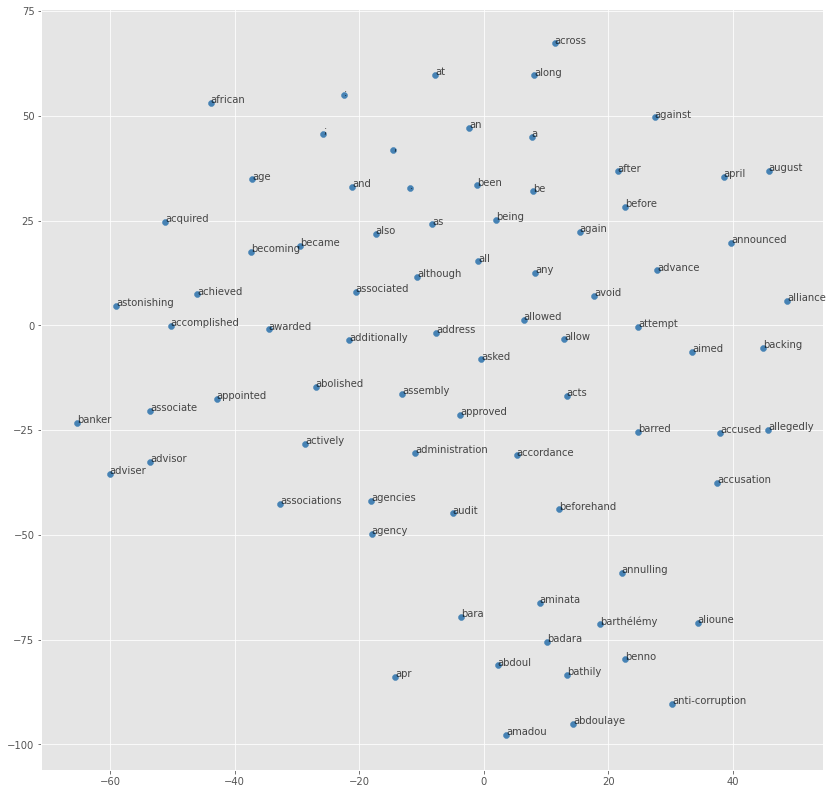

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*gensim_embed_tsne[idx, :], color='steelblue')
    plt.annotate(embed_words[idx], (gensim_embed_tsne[idx, 0], gensim_embed_tsne[idx, 1]), alpha=0.7)

### In conclusion visualization with the `GloVe vectors` for some selected words performs better compared to the `SVD based embedding` using the vectorizer. Also, the use of `TSNE` has a good visuals than the factorization matrix obtained from the SVD method. 